# Q-twisted state animation
[The size of the sync basin; Chaos **16**, 015103 (2006)](https://doi.org/10.1063/1.2165594)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from scipy.stats import mode, norm

### ANIMATAION 관련 ###
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [48]:
@jit(nopython = True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

@jit(nopython = True)
def Kuramoto(Theta,t,omega,N,Aij):
    Theta = Theta.copy()
    theta = Theta[:N]
    theta_i= theta.reshape(1,-1)
    theta_j = theta_i.T
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega +  np.sum(Aij*np.sin(theta_j - theta_i),axis=0)
    Theta[:N] = dtheta
    return Theta

In [52]:
# System size & Nearest neigbors number k setting
N = 80
k = 1
Aij = np.zeros((N,N))
for i in range(N):
    j = np.arange((i-k),(i+k+1),1)%N
    Aij[i,j]= 1
    Aij[i,i] = 0

In [53]:
dt = 0.1
t_end = 1000
t = np.arange(0, t_end+dt/2, dt)
Q_want = [4]
Q = 6
while Q not in Q_want:
    omega = 0
    theta_random = np.random.uniform(-np.pi, np.pi, size=N)
    sol = RK4(Kuramoto,theta_random,t, args=(omega,N,Aij))
    theta_s = sol[:,:N]
    Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]
    rphi = (np.mean(np.exp(1j*theta_s.T),axis=0))
    r = np.abs(rphi)
    Q, np.mean(r[-500:])
    psi = np.angle(rphi)
    rtheta_s = (theta_s.T-psi).T
    print(int(Q))

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_17821/1510617594.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]


0
2
-1
-1
-1
2
1
0
-1
2
0
-1
-1
1
1
-2
0
3
2
-1
0
-2
1
2
3
-1
-3
-1
2
1
1
1
0
-1
-2
0
-1
0
0
-2
2
-1
1
0
0
3
0
0
0
-2
2
2
0
2
1
0
1
0
0
-5
-1
1
0
-3
1
-1
-1
1
-1
-2
-2
1
0
2
0
1
3
1
0
-3
1
0
2
-2
0
0
1
0
1
0
-1
0
1
0
-3
-2
1
0
-1
0
3
3
0
-1
-2
0
0
0
0
3
0
0
-3
-1
-1
-3
0
0
0
0
0
2
2
-2
1
0
1
-1
2
0
0
2
1
2
-1
1
1
2
-1
-2
-1
-2
1
0
4


Text(0.5, 0, '$r$')

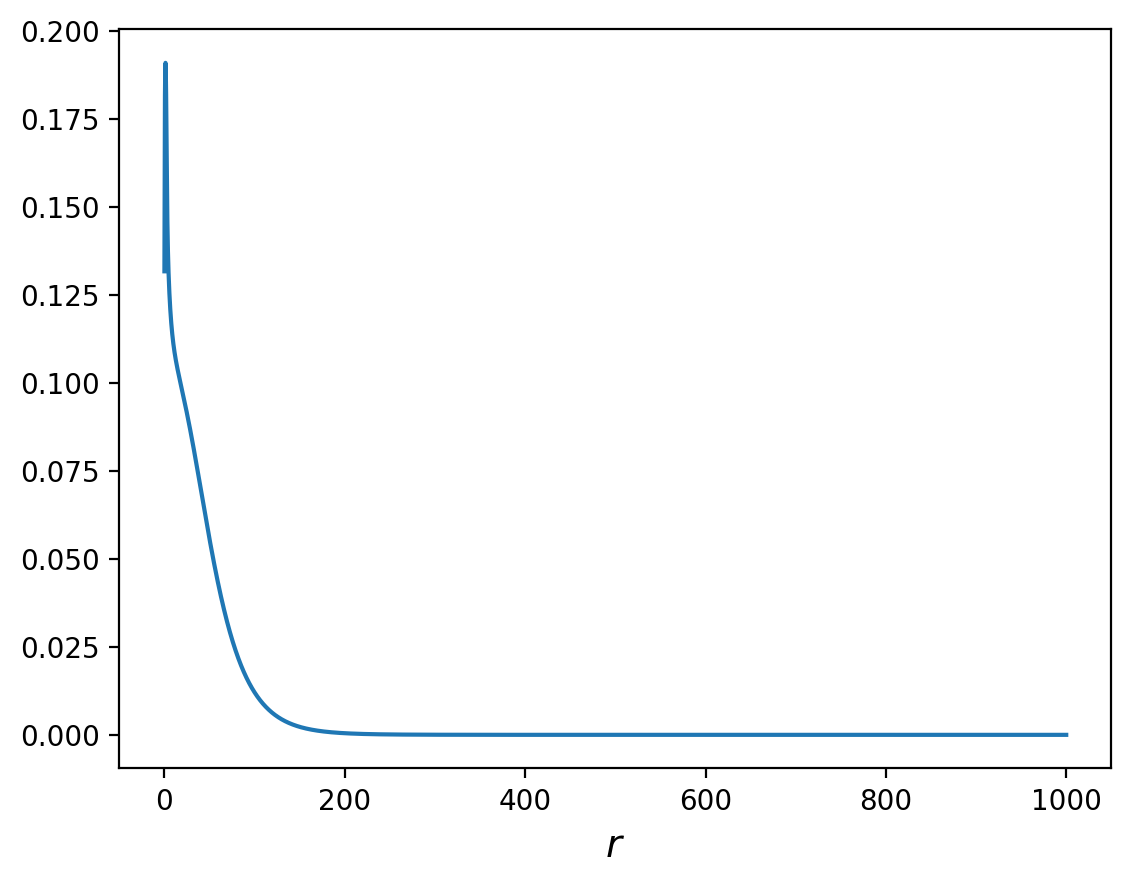

In [56]:
plt.plot(t,r)
plt.xlabel('$t$',fontsize=14)
plt.xlabel('$r$',fontsize=14)

(-1.2, 1.2, -1.2, 1.2)

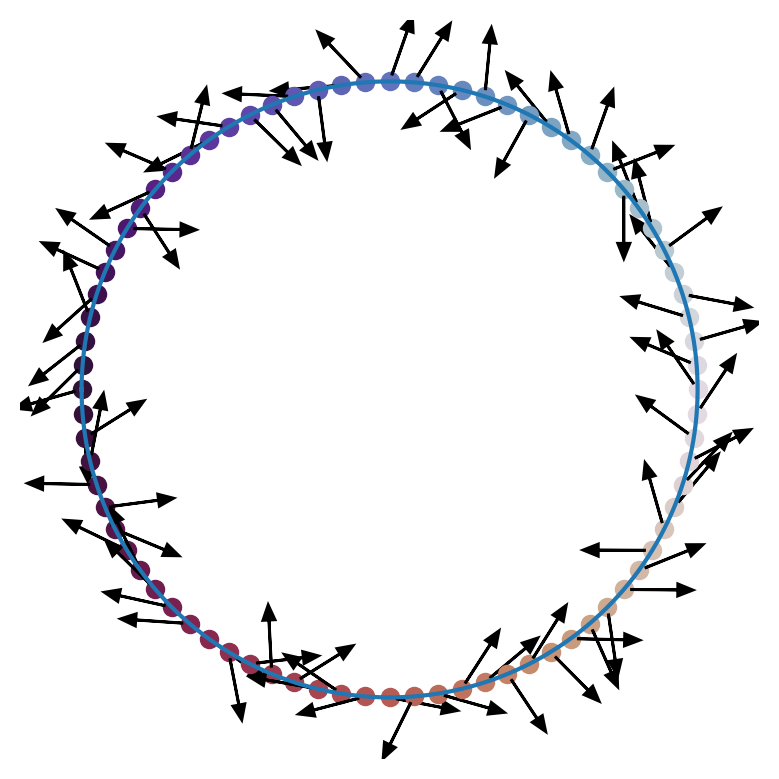

In [57]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')


theta_0 = rtheta_s[-1][0]
colors= plt.cm.twilight(np.linspace(0,1,N))
# for j,cm in range(0,100,10),colors:
j = 0
for i,(theta,color) in enumerate(zip(rtheta_s[j],colors)):
    o_deg = 2*np.pi*i/N
    o_x ,o_y =np.cos(o_deg),np.sin(o_deg)
    plt.scatter(o_x ,o_y,color=color)
    deg = theta
    x,y = np.cos(deg-theta_0),np.sin(deg-theta_0)
    length = 0.2
    head = 0.05

    ax.arrow(o_x,o_y,x*(length),y*(length),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

In [58]:
def to_animation(idx):
    ax.clear()
    theta_0 = rtheta_s[-1][0]
    # for j,cm in range(0,100,10),colors:
    for i,(theta,color) in enumerate(zip(rtheta_s[idx],colors)):
        o_deg = 2*np.pi*i/N
        o_x ,o_y =np.cos(o_deg),np.sin(o_deg)
        ax.scatter(o_x ,o_y,color=color)
        deg = theta
        x,y = np.cos(deg-theta_0),np.sin(deg-theta_0)
        length = 0.2
        head = 0.05
        ax.arrow(o_x,o_y,x*(length),y*(length),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [59]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,8000,40)
ani = FuncAnimation(fig,to_animation,frames=idxs,interval=50)

In [60]:
# 저장이 필요할 경우
# ani.save(f'Q_state/N = {N}, Q = {int(Q)}.mp4',dpi=400)

In [61]:
# 확인용
HTML(ani.to_html5_video())